<img src="http://orientacion.universia.net.co/imgs2011/imagenes/logo-header-konradlorenz.png">
# Big Data
### Analizando los datos
<b>Nombre:</b> Viviana Márquez<br>
<b>Código:</b> 614132005<br>
<hr>

#### Importar librerias & funciones para quitar acentos y puntuación

In [1]:
import csv
import unicodedata
import sys
stdout = sys.stdout
reload(sys)
sys.setdefaultencoding('utf-8')
sys.stdout = stdout
import string
%matplotlib inline
import scipy 
import numpy as np
import matplotlib.pyplot as plt
import nltk
#nltk.download()
import os
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
import mpld3

In [2]:
def remove_accents(input_str):
    nkfd_form = unicodedata.normalize('NFKD', unicode(input_str))
    return u"".join([c for c in nkfd_form if not unicodedata.combining(c)])

predicate = lambda x:x not in string.punctuation

<hr>
#### Abrir el archivo y traer todos los tuits

In [3]:
tweets = []
with open('/Users/vivianamarquez/Desktop/Project/2/2.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        tweets.append(row)

In [4]:
total = len(tweets)
print 'Total de Tweets:',total

Total de Tweets: 624


<hr>
#### Lugares

In [5]:
lugares = {}
for t in tweets:
    try:
        lugares[t['city']] += 1
    except:
        lugares[t['city']] = 1
print 'Cantidad\tLugar'
for k in lugares.keys():
    print lugares[k],'\t\t',k

Cantidad	Lugar
1 		Benito Juárez
2 		Arganda del Rey
2 		La Plata
3 		Salamanca
1 		Mexico
601 		N/A
4 		Bogotá, D.C.
4 		United States
2 		Valladolid
1 		Concepción
3 		Medellín


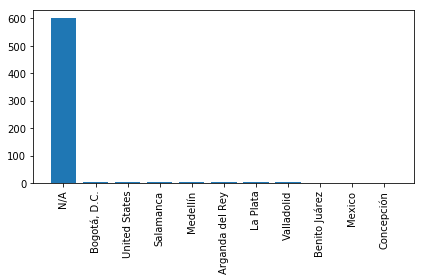

In [6]:
frec = [(x,lugares[x]) for x in lugares.keys()]
frec.sort(key=lambda x:x[1], reverse=True)

places, frequencies = zip(*frec)

indices = np.arange(len(frec))
plt.bar(indices, frequencies)
plt.xticks(indices, places, rotation='vertical')
plt.tight_layout()
plt.show()

<hr>
##### Palabras

In [7]:
palabras = {}

for t in tweets:
    texto = filter(predicate,remove_accents(t['text'])).lower().split()
    for w in texto:
        if ("@" not in w) and ("http" not in w) and len(w)>4:
            try:
                palabras[w] += 1
            except:
                palabras[w] = 1
                
del palabras["matematicas"]
                
veces_palabras = sum(palabras.values())
print "Total palabras diferentes:",len(palabras)
print "Total de veces que se usan las palabras:", veces_palabras

Total palabras diferentes: 1493
Total de veces que se usan las palabras: 3424


In [8]:
def mostrarInfo(info):
    for k in info:
        print k[1],"\t",k[0]
        
#Cada palabra del diccionario, y la cantidad que se presenta. 
frec = [(x,palabras[x]) for x in palabras.keys()]
#Las organiza. Key=lambda agiliza porque llama exactamente una vez cada input. Organiza a partir del parametro [1]
frec.sort(key=lambda x:x[1], reverse=True)
#Para mostrarlas fancy.
mostrarInfo(frec[0:20])

34 	cuando
24 	numero
22 	curiosa
22 	utilizada
22 	cifra
19 	fisica
19 	porque
16 	alguien
16 	siempre
16 	tengo
15 	examen
15 	ciencias
15 	youtube
15 	video
15 	clase
13 	clases
13 	vigilan
13 	salud”
13 	libro
13 	tambien


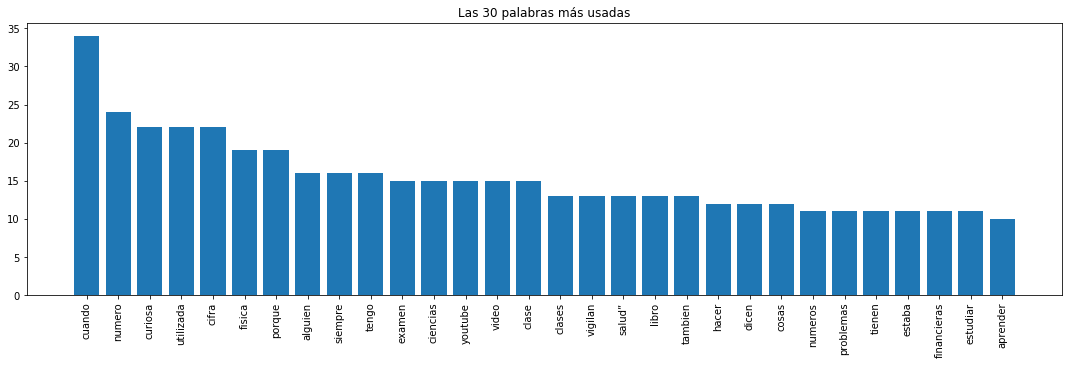

In [9]:
words, frequencies = zip(*frec[0:30])
indices = np.arange(len(frec[0:30]))

plt.figure(figsize=(15,5))
plt.bar(indices, frequencies)
plt.xticks(indices, words, rotation='vertical')
plt.tight_layout()
plt.title("Las 30 palabras más usadas")
plt.show()

In [10]:
def fun_idf(total_palabras, times):
    w = np.log10(total_palabras/times)
    return w

In [11]:
palabras_idf = {}
for key,value in palabras.iteritems():
    try:
        palabras_idf[key] += fun_idf(veces_palabras,value)
    except:
        palabras_idf[key] = fun_idf(veces_palabras,value)
        
frec2 = [(x,palabras_idf[x]) for x in palabras_idf.keys()]
#Las organiza. Key=lambda agiliza porque llama exactamente una vez cada input. Organiza a partir del parametro [1]
frec2.sort(key=lambda x:x[1], reverse=True)
mostrarInfo(frec2[0:20])

3.53453375601 	proenemoficial
3.53453375601 	deport
3.53453375601 	porno
3.53453375601 	const
3.53453375601 	madera
3.53453375601 	acreditado
3.53453375601 	integrado
3.53453375601 	cuartarevolucionindustrial
3.53453375601 	griego
3.53453375601 	sumemos
3.53453375601 	aprobo
3.53453375601 	etapas
3.53453375601 	cambiar
3.53453375601 	resto
3.53453375601 	olvidate
3.53453375601 	infantil
3.53453375601 	incorpora
3.53453375601 	ztffct
3.53453375601 	contenidoseducativos
3.53453375601 	esteticaa


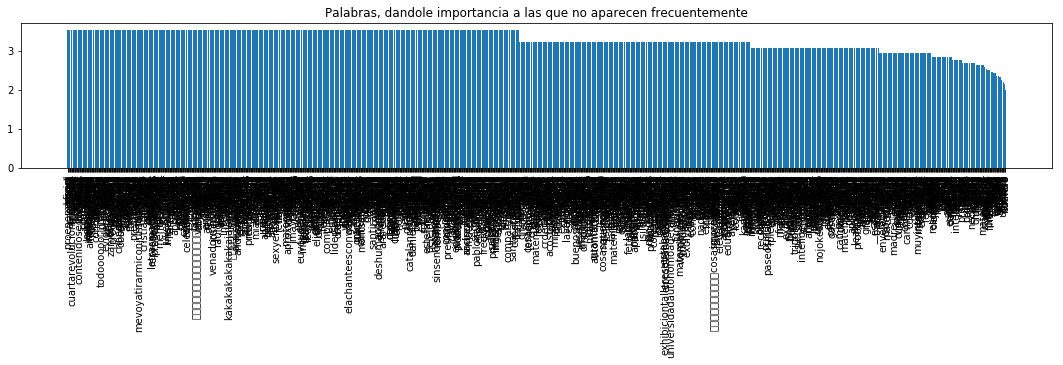

In [12]:
words, frequencies = zip(*frec2)
indices = np.arange(len(frec2))

plt.figure(figsize=(15,5))
plt.bar(indices, frequencies)
plt.xticks(indices, words, rotation='vertical')
plt.tight_layout()
plt.title("Palabras, dandole importancia a las que no aparecen frecuentemente")
plt.show()

<hr>
#### Documentos

In [13]:
tuits = {}
for t in tweets:
    tuits[t['user']] = filter(predicate,remove_accents(t['text'])).lower()

In [14]:
docs = [(x,tuits[x]) for x in tuits.keys()]

In [15]:
for d in docs:
    if "problemas" in str(d[1]):
        print d[0],'\n',d[1],"\n\n"

matematicascl 
acabo de ver las cuatro etapas del cerebro para resolver problemas  matematicos  haga clic ver tambien ☛  httpstcopnddxy2rzf 


BrandoPk123 
se suicido cuaderno de matematicas tenia muchos problemas 😥😥😂😂 


ColeLuisBunuel 
resolviendo problemas de matematicas en 5°primaria coleluisbunuel httpstco9ejcczdez4 


nicolargacha 
parece que siguen con “problemas de matematicas los muchachos” httpstcosrr20qw5av 


Argenttty 
la solucion de los problemas esta en el propio problema o eso dicen las matematicas muggles httpstcojy2ynm6an4 


Chico76456367 
esta tiene mas problemas que un libro de matematicas histerica
🙊🙊🙊🙊🙊🙊🙊🙊🙊🙊🙊🙊 


David_ryt 
resumen las matematicas solo dan problemas y los problemas si incluyen integrales chungas peor que peor 
delejornadas17 




<hr>

In [16]:
d1 = [] #usuarios
d2 = [] #textos

for d in docs:
    d1.append(d[0])
    d2.append(d[1])

In [17]:
vectorizer = CountVectorizer(input='content')
dtm = vectorizer.fit_transform(d2)
vocab = np.array(vectorizer.get_feature_names())
dtm = dtm.toarray()

In [18]:
# normalize counts to rates per 1000 words
rates = 1000 * dtm / np.sum(dtm, axis=1, keepdims=True)

In [19]:
rates[:, 25:30]
#columnas cada una de las palabras
#filas tuits

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       ..., 
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [20]:
vocab[25:30]

array([u'500', u'51', u'5510', u'60', u'630'], 
      dtype='<U35')

In [21]:
#Similaridad del coseno
dist = 1 - cosine_similarity(dtm)
mds = MDS(n_components=2, dissimilarity="precomputed") #Multidimensional scaling
pos = mds.fit_transform(dist)  #distancia entre ellos

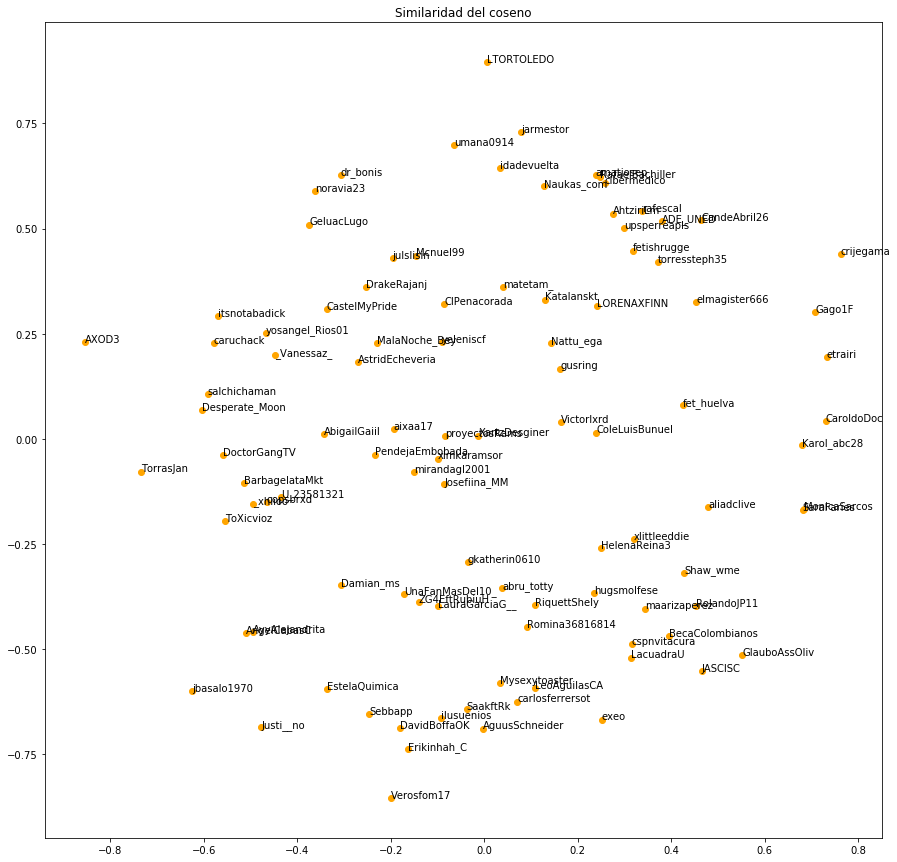

In [22]:
xs, ys = pos[100:200, 0], pos[100:200, 1]
names = d1[100:200]
plt.figure(figsize=(15,15))
for x, y, name in zip(xs, ys, names):
    plt.scatter(x, y, c="orange")
    plt.text(x, y, name)
plt.title("Similaridad del coseno")

In [23]:
print tuits["dr_bonis"]
print ""
print tuits["Verosfom17"]

wrojewski seranodino que el sistema de ingreso a facultades de medicina seleccione principalmente a chicas empoll httpstcohxpxjjwndz

doelgomo estefanymena3 lauravignatti nadaldrama minorfanita alvaralai mimifdez9 anakaroulloa httpstcopexbuixscj


In [24]:
print tuits["SaraFaries"]
print ""
print tuits["MonicaSarcos"]

numero pi una curiosa cifra utilizada para casi todo matematicas httpstcohwvjmefls7

numero pi una curiosa cifra utilizada para casi todo matematicas httpstcontbkq1igpp


<hr>

In [25]:
stopwords = nltk.corpus.stopwords.words('spanish')

In [26]:
# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("spanish")

In [27]:
# here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [28]:
d3 = []
for d in d2:
    for w in d.split(" "):
        if len(w)<4:
            d = d.replace(w,"")
    text = d
    d3.append(text)

In [29]:
d4 = []
for d in d3:
    for w in d.split(" "):
        if w=="matematicas":
            d = d.replace(w,"")
    text = d
    d4.append(text)

In [30]:
#not super pythonic, no, not at all.
#use extend so it's a big flat list of vocab
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in d4:
    allwords_stemmed = tokenize_and_stem(i) #for each item in 'synopses', tokenize/stem
    totalvocab_stemmed.extend(allwords_stemmed) #extend the 'totalvocab_stemmed' list
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

In [31]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
print "there are ",str(vocab_frame.shape[0]) , "items in vocab_frame"

there are  3089 items in vocab_frame


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, max_features=200000,
                                 min_df=0.1,
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

tfidf_matrix = tfidf_vectorizer.fit_transform(d4)
print(tfidf_matrix.shape)

(393, 2)


In [38]:
terms = tfidf_vectorizer.get_feature_names()

In [39]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)
print
print

In [44]:
from sklearn.cluster import KMeans

num_clusters = 3

km = KMeans(n_clusters=num_clusters)

km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

In [50]:
from sklearn.externals import joblib

#uncomment the below to save your model 
#since I've already run my model I am loading from the pickle

joblib.dump(km,  'doc_cluster.pkl')
km = joblib.load('doc_cluster.pkl')
clusters = km.labels_.tolist()

In [51]:
ttt = { 'user': d1, 'tweets': d4, 'cluster': clusters}
frame = pd.DataFrame(ttt, index = [clusters] , columns = ['user', 'tweets', 'cluster'])

In [54]:
frame['cluster'].value_counts()

1    284
2     62
0     47
Name: cluster, dtype: int64

In [58]:
from __future__ import print_function

print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :3]: #replace 6 with n words per cluster
        print(' %s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    print() #add whitespace
    print() #add whitespace
    
    print("Cluster %d titles:" % i, end='')
    for title in frame.ix[i]['user'].values.tolist():
        print(' %s,' % title, end='')
    print() #add whitespace
    print() #add whitespace
    
print()
print()

Top terms per cluster:

Cluster 0 words: para, mtemtics,

Cluster 0 titles: matematicascl, luciaelenajonas, bettymmar, CPBSANTAANA, Textweets, didactalia24h, sabir_es, maulee, Cademyrd, RoxanaFadul, MonicaSarcos, SaraFaries, CastelMyPride, BecaColombianos, jarmestor, BarbagelataMkt, LacuadraU, aliadclive, LenteMagazine, Chilan2001, ContenidosAR, Julianmmag, Twittofilia, TaniaBalday, marietemj8, VieyraTania, AreaEstudiantis, DatoFit, Reportes24H, arivol7, jonathan71b, FranjaCultural, Trinautas, bdebellezaahre, rubenftskyes, AdoracionDiaria, yamilaojeda14, AinaraLucumi, BraccoGer_FanMx, thestarkill24, Javisburgos, GisellaLud, DanaArizpe, ArianaFrancoH, Luis_10_MH, msn_es, ProntuarioES,

Cluster 1 words: para, mtemtics,

Cluster 1 titles: _jjimenez, ofertazasbebe, Marianac1620, MASolerNeira, Aen1485, Rioja2, fespm_es, syuloves, EstefanyMena3, stf_ov, nicolasziletti, drinaferrer626, Avri_R, RuiiMelo, lutteomysign, Burbudella, ma_lopezdelpozo, DreamMachine98, namtacos, ChicoSimbar, dybalamy

In [59]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
print()
print()

In [60]:
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3'}

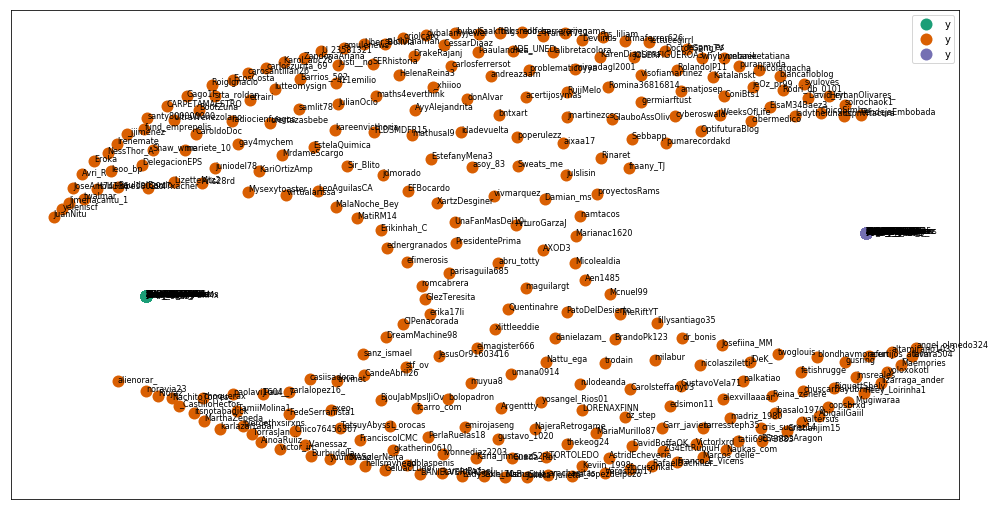

In [63]:
#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=d1)) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
             color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=8)  

    
    
plt.show() #show the plot

#uncomment the below to save the plot if need be
#plt.savefig('clusters_small_noaxes.png', dpi=200)

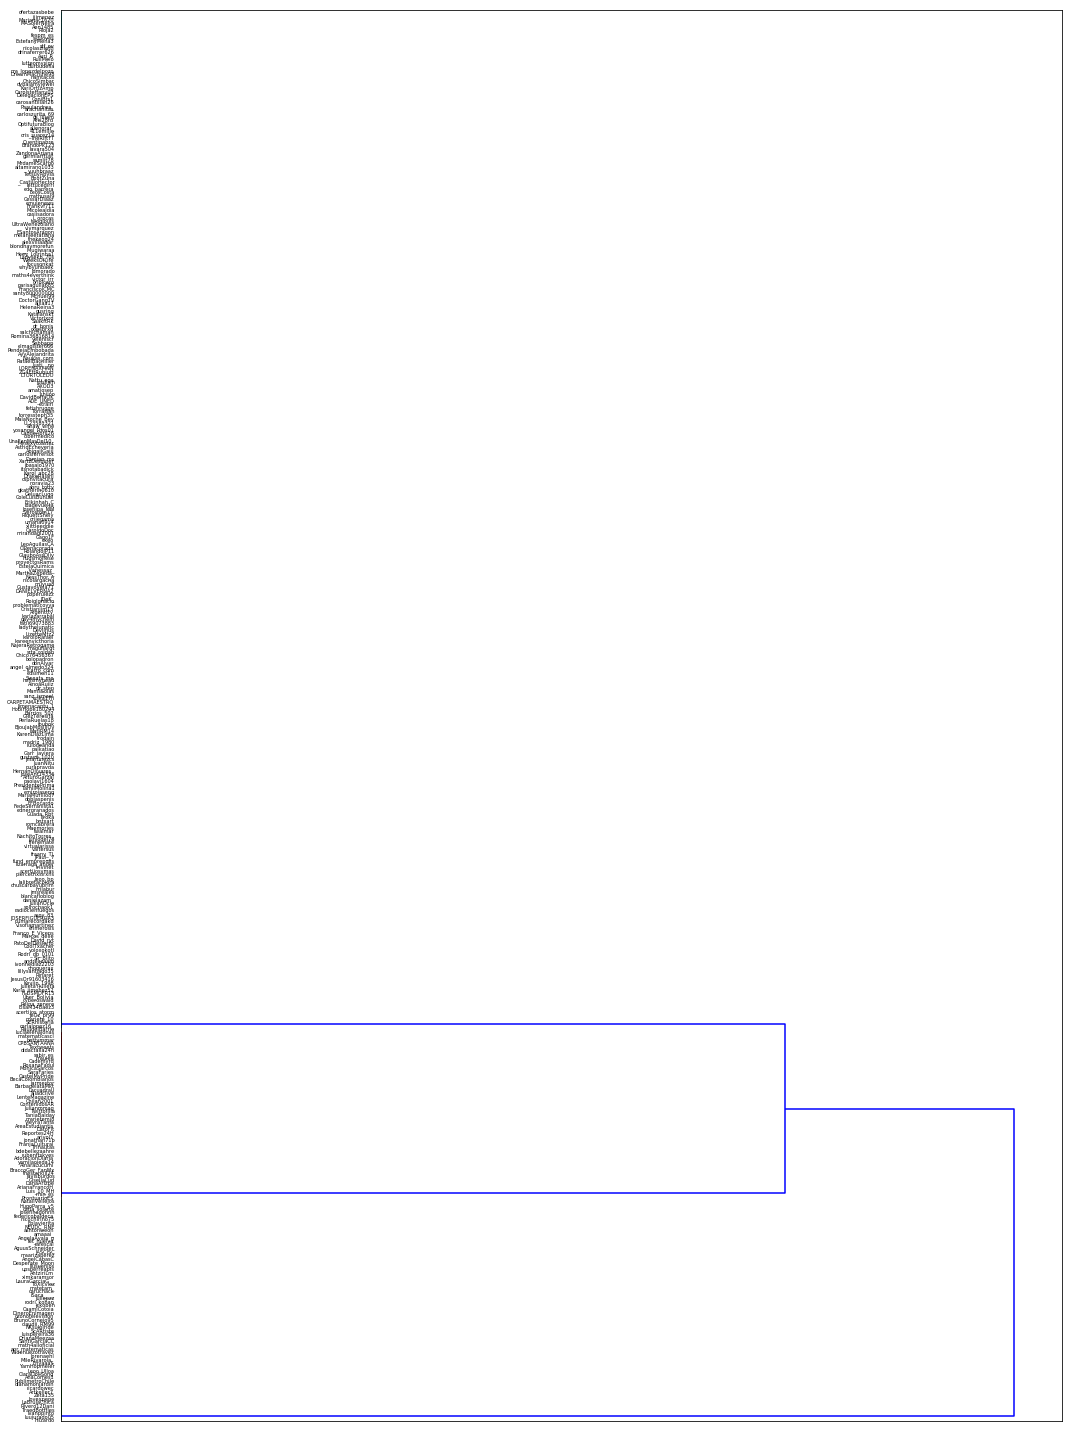

In [64]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=d1);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters